In [ ]:
# Kraken Library 

# Detect lines of text as a bounding box in a given image : Kraken 
# Tessaract doesnt have a layout engine, so wants a good clean text
# kraken to bisegment images 


In [1]:
# importing libraries 

import kraken
help(kraken)


Help on package kraken:

NAME
    kraken - entry point for kraken functionality

PACKAGE CONTENTS
    align
    binarization
    blla
    ketos
    kraken
    lib (package)
    linegen
    pageseg
    repo
    rpred
    serialization
    transcribe

FILE
    /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/kraken/__init__.py




In [5]:
# pageseg module from Kraken 
from kraken import pageseg
help(pageseg)

Help on module kraken.pageseg in kraken:

NAME
    kraken.pageseg

DESCRIPTION
    kraken.pageseg
    ~~~~~~~~~~~~~~
    
    Layout analysis and script detection methods.

FUNCTIONS
    segment(im, text_direction: str = 'horizontal-lr', scale: Optional[float] = None, maxcolseps: float = 2, black_colseps: bool = False, no_hlines: bool = True, pad: int = 0, mask: Optional[numpy.ndarray] = None, reading_order_fn: Callable = <function reading_order at 0x7fc385b191f0>) -> Dict[str, Any]
        Segments a page into text lines.
        
        Segments a page into text lines and returns the absolute coordinates of
        each line in reading order.
        
        Args:
            im (PIL.Image): A bi-level page of mode '1' or 'L'
            text_direction (str): Principal direction of the text
                                  (horizontal-lr/rl/vertical-lr/rl)
            scale (float): Scale of the image
            maxcolseps (int): Maximum number of whitespace column separators
   

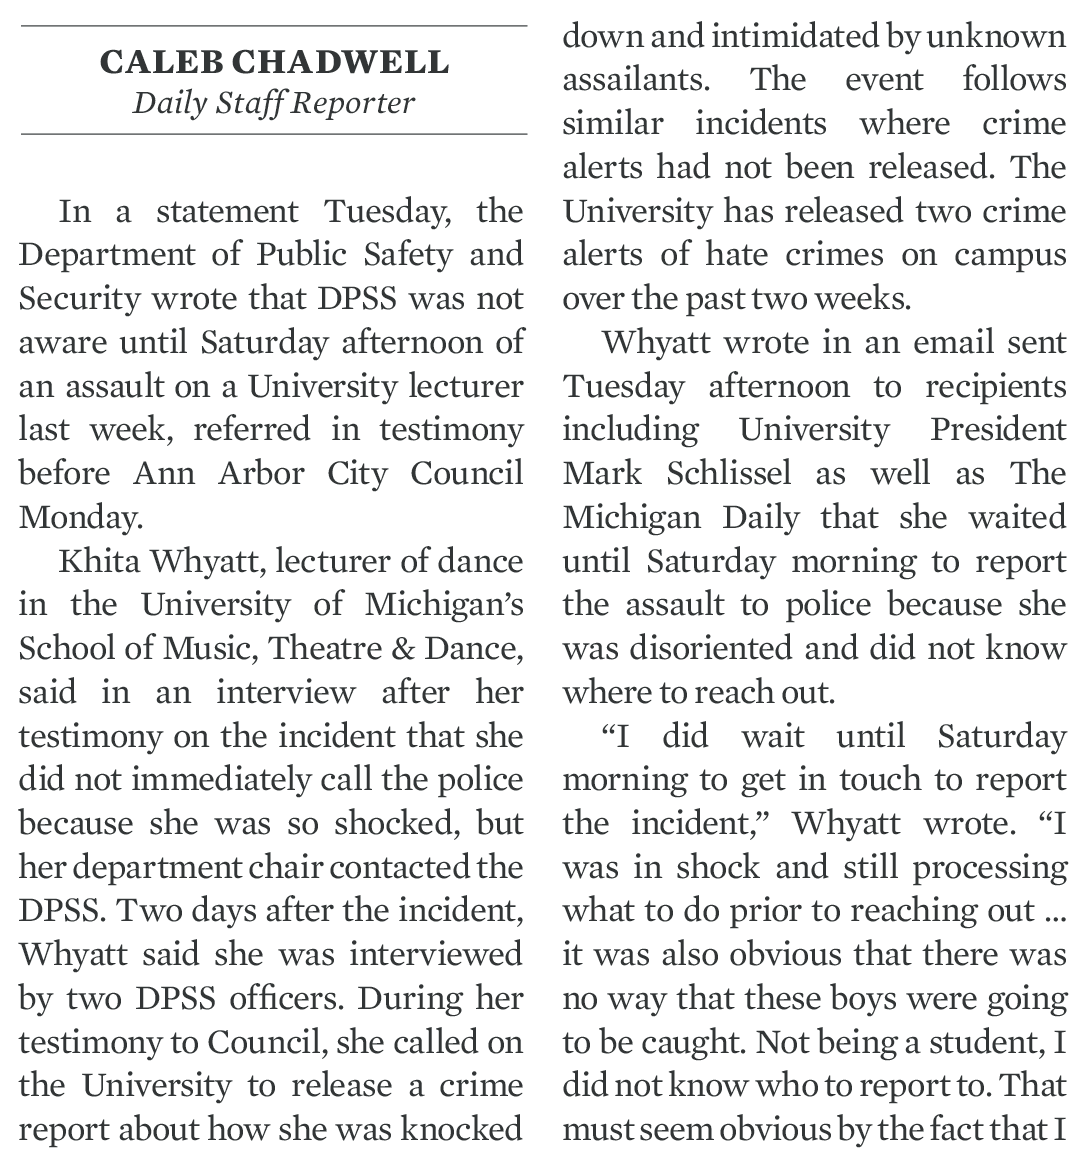

Too many connected components for a page image: 5920


[]


In [8]:
from PIL import Image
im = Image.open('Files/home/jovyan/work/readonly/two_col.png')
display(im)

# creating bouding boxes by passing 1 : 1 (1-bit pixels, black and white, stored with one pixel per byte)
# pageseg returns a dictionary with keys 'text_direction' and 'boxes'

bounding_boxes = pageseg.segment(im.convert('1'))['boxes']
print(bounding_boxes)


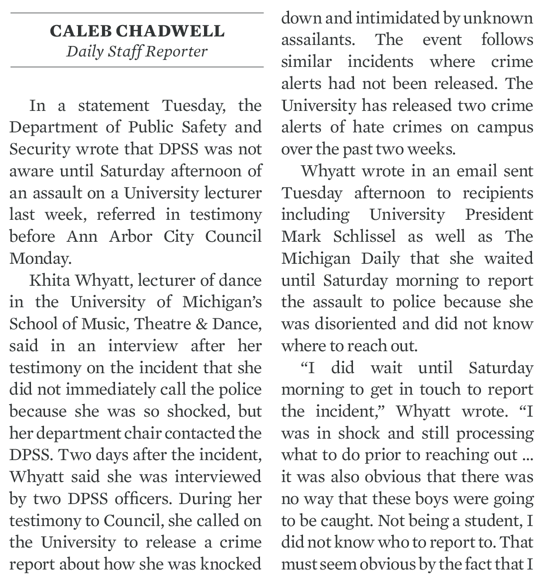

In [24]:
# maybe reducing the size of the image might work 
im_resize = im.resize((int(im.width/1.6),int(im.height/1.6)))
display(im_resize)


In [25]:
bounding_boxes = pageseg.segment(im_resize.convert('1'))['boxes']
print(bounding_boxes)


[[62, 31, 280, 46], [82, 55, 259, 75], [352, 13, 666, 34], [352, 40, 666, 57], [324, 68, 665, 84], [352, 95, 665, 112], [36, 122, 665, 143], [12, 149, 666, 170], [11, 177, 568, 198], [11, 204, 328, 225], [375, 204, 665, 225], [11, 232, 665, 253], [11, 258, 665, 279], [11, 286, 664, 307], [11, 313, 88, 334], [351, 313, 665, 334], [36, 341, 665, 362], [12, 368, 665, 389], [11, 395, 666, 415], [11, 423, 520, 439], [11, 450, 325, 471], [11, 477, 325, 498], [11, 504, 326, 524], [11, 532, 325, 553], [11, 559, 325, 579], [11, 586, 325, 607], [11, 614, 326, 634], [11, 641, 326, 662], [11, 668, 325, 689], [11, 695, 325, 716], [375, 450, 665, 471], [351, 477, 665, 498], [351, 504, 664, 525], [351, 532, 666, 553], [351, 559, 665, 580], [351, 586, 665, 603], [351, 614, 666, 635], [351, 641, 665, 662], [351, 668, 665, 689], [351, 695, 664, 716]]


In [46]:
# checking for what size images imseg is working. Its working after 16
# resize percentage :  0.625 , ie i = 16 

# use this to create a routine which checks if the output is [], then tries with a reduced size image
for i in range(11,21,1):
    j = i/10
    newim = im.resize((int(im.width/j), int(im.height/j)))
    bb = pageseg.segment(newim.convert('1'))['boxes']
    print(i)
    print("resize percentage : " , 1/j)
    #display(newim)
    print(newim.size)
    print(bb)
    print("--------------------------------------------------------")


Too many connected components for a page image: 3869
Too many connected components for a page image: 1954


11
resize percentage :  0.9090909090909091
(985, 1064)
[]
--------------------------------------------------------
12
resize percentage :  0.8333333333333334
(903, 975)
[]
--------------------------------------------------------


Too many connected components for a page image: 1212
Too many connected components for a page image: 767


13
resize percentage :  0.7692307692307692
(833, 900)
[]
--------------------------------------------------------
14
resize percentage :  0.7142857142857143
(774, 836)
[]
--------------------------------------------------------
15
resize percentage :  0.6666666666666666
(722, 780)
[[66, 33, 299, 49], [88, 59, 277, 80], [346, 14, 710, 36], [375, 43, 710, 61], [344, 72, 710, 90], [376, 101, 710, 119], [39, 131, 710, 153], [12, 159, 710, 182], [12, 189, 606, 211], [12, 218, 349, 240], [400, 218, 709, 240], [12, 247, 709, 270], [12, 276, 709, 298], [11, 305, 709, 327], [12, 334, 94, 356], [375, 334, 709, 357], [39, 364, 709, 386], [12, 392, 709, 415], [12, 422, 710, 443], [12, 451, 554, 469], [12, 480, 347, 502], [12, 509, 347, 531], [11, 538, 347, 559], [12, 568, 347, 590], [12, 596, 347, 618], [12, 626, 347, 648], [12, 655, 348, 677], [12, 684, 347, 706], [12, 713, 347, 735], [12, 742, 347, 765], [400, 480, 709, 502], [374, 509, 709, 531], [374, 538, 708, 560], [374, 568, 710, 590], [374

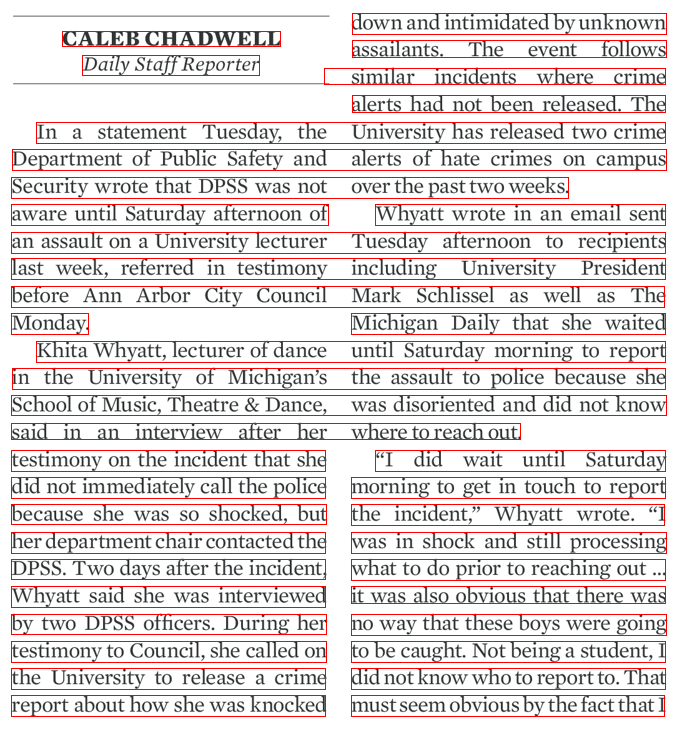

In [28]:
# routine to draw lines corroesponding to the bounding boxes on the image 
def show_boxes(img):
    '''Modifies the passed image to show a series if bounding boxes on an image as run by kraken
    :param img: A PIL.Image object
    :return img: The modified PIL.Image object with bounding boxes drawn over in red
    '''
    
    # create imagedraw object 
    from PIL import ImageDraw
    drawing_object = ImageDraw.Draw(img)
    bounding_boxes = pageseg.segment(img.convert('1'))['boxes']
    for box in bounding_boxes:
        drawing_object.rectangle(box,fill=None, outline='red')
    return img
display(show_boxes(im_resize))

In [29]:
# it shows Kraken doesnt know what to do when there are two columns of text in the image 
# to improve, we ca use black_colseps function of segment module : black_colseps (bool): Whether column separators are assumed to be
# vertical black lines or not
# we will add a black separator between columns, and set the black_col in segment module to be True

def show_boxes_blackcol(img):
    '''Modifies the passed image to show a series if bounding boxes on an image as run by kraken
    :param img: A PIL.Image object
    :return img: The modified PIL.Image object with bounding boxes drawn over in red
    '''

    # create imagedraw object
    from PIL import ImageDraw
    drawing_object = ImageDraw.Draw(img)
    bounding_boxes = pageseg.segment(img.convert('1'), black_colseps=True)['boxes'] # black_colseps = True, added black column separator
    for box in bounding_boxes:
        drawing_object.rectangle(box, fill=None, outline='red')
    return img




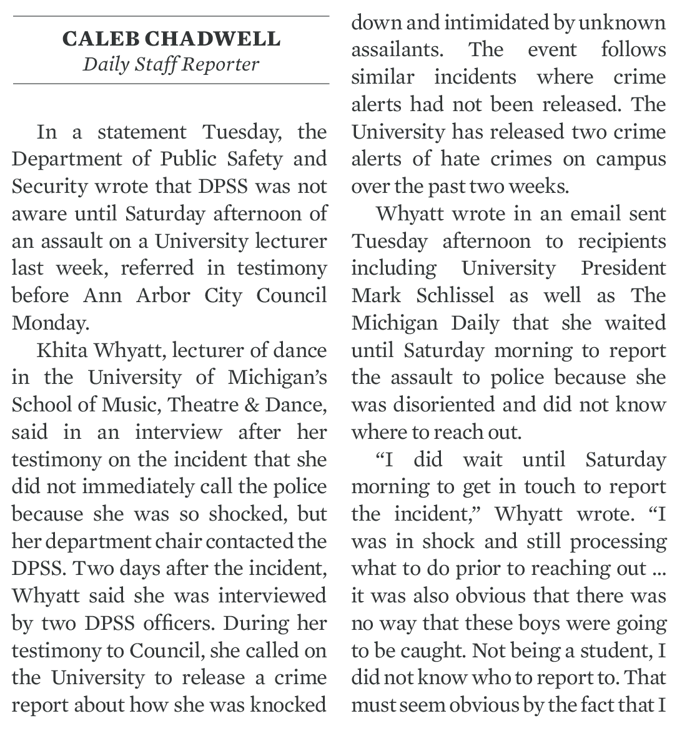

In [47]:
# My method 
# make a single long vertical line in the middle of the page to separate the columns 
im = Image.open('Files/home/jovyan/work/readonly/two_col.png')
im_resize = im.resize((int(im.width/1.6), int(im.height/1.6)))
imcopy = im_resize.copy()
display(imcopy)




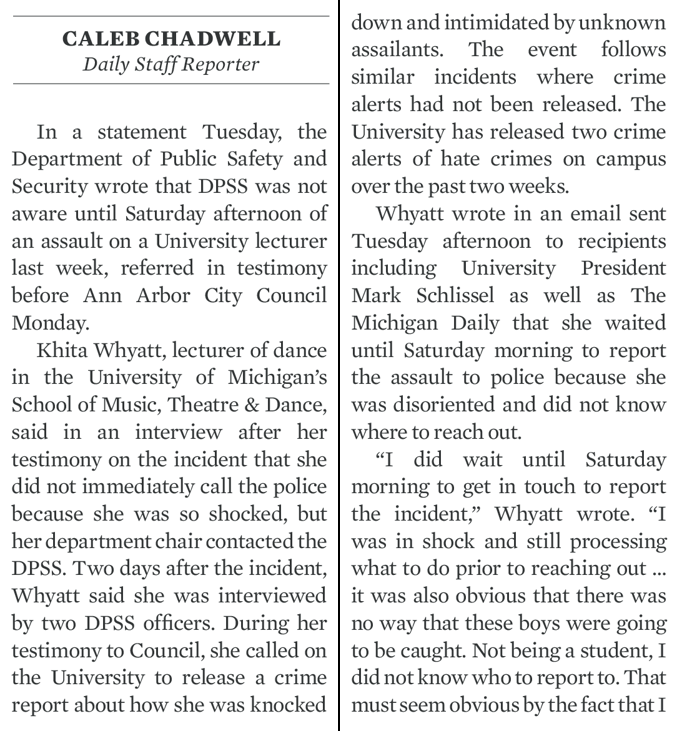

In [36]:
from PIL import ImageDraw
drawobj = ImageDraw.Draw(imcopy)
drawobj.line((int((imcopy.width)/2), 0, (int((imcopy.width)/2),
             imcopy.height)), fill='black', width=2)
display(imcopy)


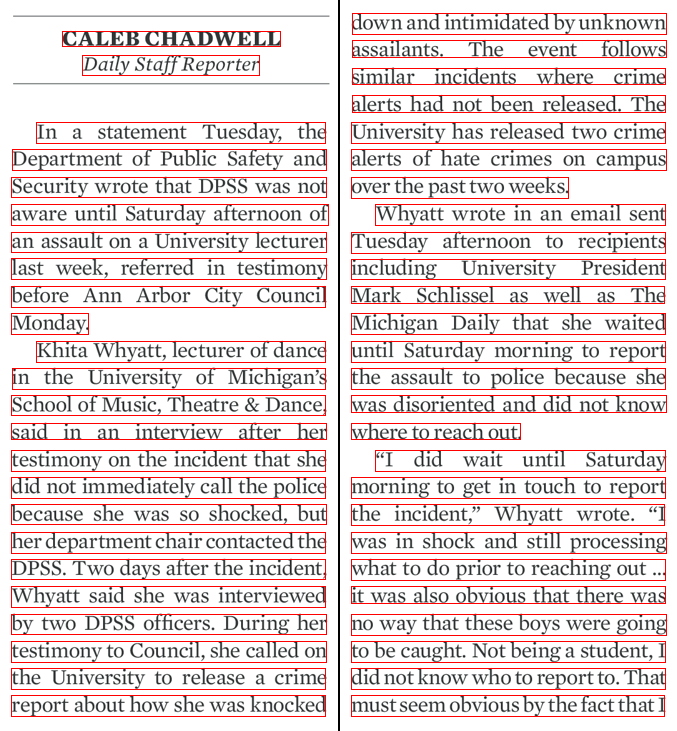

In [37]:
display(show_boxes_blackcol(imcopy))

# my method of dividing the page using a column separator worked 

In [48]:
# method from the lecture 
# TS : 6:30 cont... 

# adding black separator between columns 
# updated showboxes function
# ------------------------------------------------------------------------- 
# DETECTING WHITE COLUMN SEPARATOR
# adding separator if space is altealst 25 pixels wide after the character , 6 lines high

char_width = 25 # could be changed with experimenting 

# height detection is harder since it would depend on the height of the text
# subroutine to calculate line height 

def calculate_line_height(img):
    '''Calculate the average height of a line from a given image
    :param img: A PIL.Image object
    :return: The average height of lines in pixels
    '''
    
    # line height can be calculated from the bounding boxes, which is a rectangle. 
    bounding_boxes = pageseg.segment(img.convert(mode='1'))['boxes']
    # boxes is a tuple of top,left,bottom,right , so height is (top-bottom) (t,l;b,r)(r-l)
    # calculate the average height across all the boxes 
    
    height_accumulator = 0
    for box in bounding_boxes:
        height = box[3] - box[1]
        height_accumulator += height
    # returning average height
    return int(height_accumulator/len(bounding_boxes))

# testing with img
line_height = calculate_line_height(im_resize)
print(line_height)


20


In [49]:
# scanning the whole image pixel by pixel to detemine a block of whitespace around it
# block size ? determine by image ( art, than sciecne )
# block should be 1 char width wide, 6 lines tall  , mostly by eyeballing the image

gapbox = (0,0,char_width,line_height*6)
gapbox

(0, 0, 25, 120)

In [ ]:
# function which check given a pixel, checks if there is a whitespace to its right and below 
# basically if the pixel has a gapbox on its right 
# if true, then insert a line to breakup this box before sending it to Kraken 

def gap_check(img,location):
    ''' Checks the img in a given (x,y) location to see if it a gap box
    :param img: PIL.Image file 
    :param location: A tuple (x,y) which is a pixel locatuon in that image 
    :return: True if it fits the def of a gap box , otherwise False 
    
    '''
    # we can get a pixel using Image.getpixel function. returns the value of pixel as a tuples of integer , one for each colour channel.
    # since we are passing a b/w image, we would get 1 value only, 255 white|0 black   
    # assuming the passed image is binarized   
    # algo to check 
    # interate over the whole image via pixels, check if pixel != 255 , return False 
    
    for x in range(location[0],location[0]+ gapbox[2]):
        for y in range(location[1],location[1]+ gapbox[3]):
            
            # checking if pixel is white, but within the given image 
            if x<img.width and y<img.height:
                if img.getpixel((x,y)) != 255:
                    return False 
    # now we managed to pass the whole gap box without finding a non white pixel, we return True , or else the fn would have 
    # broken before and returned False 
    # So now we return True, meaing its a gap 
    return True 


            

In [ ]:
# After finding the gap, draw a line in the middle of the gap 
# Function to draw the line 

def draw_sep(img,location):
    '''Draws an line in image in the middle of the gap discovered at the location
    :param img: A PIL.image file 
    :param location: a tuple(x,y) which is a pixel location in the image
    '''
    
    # drawing object 
    from PIL import ImageDraw
    draw_object = ImageDraw.Draw(img)
    # determioning the middle coordinates 
    x1 = location[0] + int(gapbox[2]/2)
    x2 = x1 # drawing a line
    y1 = location[1]
    y2 = y1 + gapbox[3]
    draw_object.rectangle((x1,y1,x2,y2),fill='black',outline='black')
    
    # no return required 
